In [235]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

6


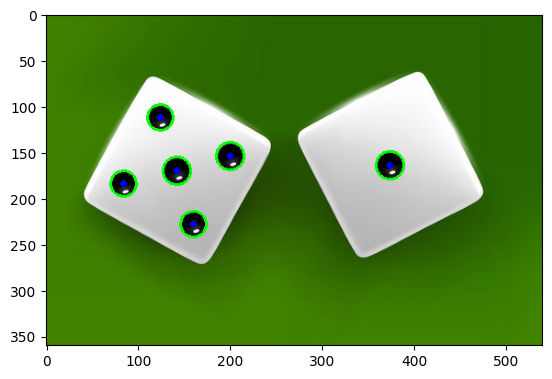

In [236]:
dice_img = cv2.imread('input/dice1.png')
dice_img1 = cv2.cvtColor(dice_img,cv2.COLOR_BGR2GRAY)

dice_img1 = cv2.medianBlur(dice_img1,5)
cimg = cv2.cvtColor(dice_img1,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(dice_img1,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=40,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(dice_img,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(dice_img,(i[0],i[1]),2,(0,0,255),3)

print(len(circles[0]))
plt.imshow(dice_img,cmap='gray')

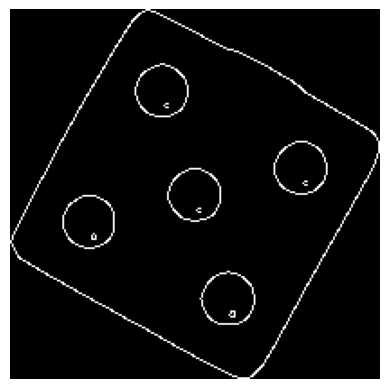

In [237]:
_,dice_thresh = cv2.threshold(dice_img1,150,255,cv2.THRESH_BINARY)
detected_edges = cv2.Canny(dice_thresh,9, 150, 3)
circles = cv2.HoughCircles(detected_edges,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
contours,hierarchy = cv2.findContours(detected_edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# print(hierarchy)
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    if cv2.contourArea(contour) > 1000:
        cv2.rectangle(dice_img,(x,y),(x+w,y+h),(150,80,200),3)

        # for i in range(len(hierarchy)):
        #     if hierarchy[0][i][3] == -1:
        #         cv2.putText(dice_img,str(len(circles[0])),(x,y - 5),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,0.5,(200,90,200),2)


x0,y0,w0,h0 = cv2.boundingRect(contours[0])
x1,y1,w1,h1 = cv2.boundingRect(contours[1])
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]
plt.axis('off')
plt.imshow(dice0,cmap='gray')

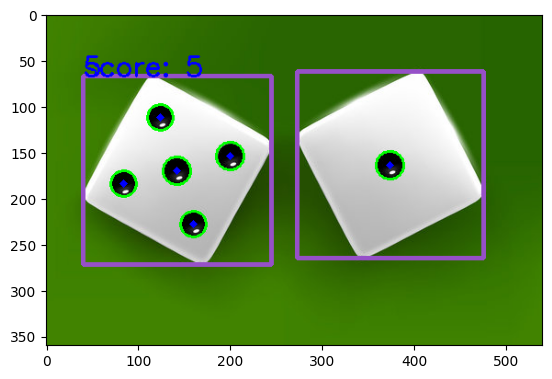

In [239]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)

cv2.putText(dice_img, f'score{len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(dice_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(dice_img)
plt.show()